<a href="https://colab.research.google.com/github/hadiwyne/weather-prediction/blob/main/Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Prediction Model

The purpose of this analysis is to make a model that can predict future weather, using historical weather data. We will use **ridge regression model** and **LightGBM** for this project. We will download the dataset from [NOAA's website](https://www.ncdc.noaa.gov/cdo-web/search). NOAA is a US Government agency that provides weather forecast data from many countries around the world.

I will be using the dataset from a weather station located in the Oakland International Airport, the records of which go back to 1948, since Airport weather sensors generally contain very good data about the weather, since they have to manage air traffic.

#Importing the dataset

In [1]:
import pandas as pd
weather = pd.read_csv('oak_weather.csv')
weather.head()

,STATION,NAME,DATE,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
0,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


As we can see here, pandas has assigned an automatic index to our dataset. However, because this is is a time-series dataset, we would want our `DATE` column to be our index. Let's do just that.

In [2]:
weather = weather.set_index('DATE')
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


Doing so makes it rather easy for us to call up slices of our dataset from a specific time period. For example, if we want to look at the data from the first month of 1960 i.e. the year our record begins, we can do that very easily by calling the `.loc` function

In [3]:
weather.loc['1960-01-01':'1960-01-31']

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1960-01-06,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1960-01-07,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
1960-01-08,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-09,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


#Data Cleaning

To begin, let's first deal with the missing values in our dataset. We can find out the percentage of missing values in each column.

In [4]:
weather.apply(lambda x: sum(x.isnull()))/weather.shape[0]

,0
STATION,0.000000
NAME,0.000000
ACMH,0.676645
ACSH,0.676645
AWND,0.487910
DAPR,0.999557
FMTM,0.878825
FRGT,0.999889
MDPR,0.999557
PGTM,0.525314


As we can see here, there are some columns which have 99% missing values. This is a very concerning issue. Now we will investigate how to handle these missing values. We will gather some help from the [**documentation**](www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf) of the dataset, which was provided to us alongside the dataset in an email from NOAA.

According to the documentation, these are the **five** core values in our dataset:

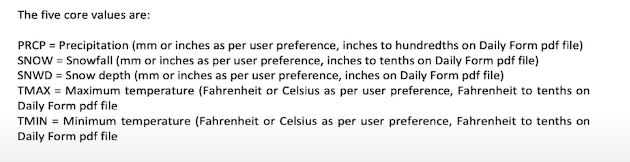

These core values are the most important for our consideration. There are a lot of other columns as well, in the dataset, and we can even see them through the following code:

In [5]:
weather.columns.tolist()

['STATION',
 'NAME',
 'ACMH',
 'ACSH',
 'AWND',
 'DAPR',
 'FMTM',
 'FRGT',
 'MDPR',
 'PGTM',
 'PRCP',
 'SNOW',
 'SNWD',
 'TAVG',
 'TMAX',
 'TMIN',
 'TSUN',
 'WDF1',
 'WDF2',
 'WDF5',
 'WDFG',
 'WSF1',
 'WSF2',
 'WSF5',
 'WSFG',
 'WT01',
 'WT02',
 'WT03',
 'WT04',
 'WT05',
 'WT07',
 'WT08',
 'WT09',
 'WT16',
 'WT18']

But we will focus our our attention on the **five** core values, which probably have the least amount of missing data, allowing us to easily handle them. Let's only select those columns relevant to us.

In [6]:
core_weather = weather[['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']].copy()

Now we've created a copy of our *original* dataset with only the **five** relevant columns. Now we will rename our columns so that they are easier to work with. We can see here that all the column names are in capital letters, and are abbreviated. This could cause confusion later on.

In [7]:
core_weather.columns = ['precipitation', 'snow', 'snow_depth', 'max_temp', 'min_temp']

In [8]:
core_weather

,precipitation,snow,snow_depth,max_temp,min_temp
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2025-05-21,0.0,NaN,NaN,74.0,49.0
2025-05-22,0.0,NaN,NaN,66.0,53.0
2025-05-23,0.0,NaN,NaN,62.0,52.0


## Handling Missing Values
Now that we've dealt with the annoying columns that were giving us 99% missing values, let's check and see whether our shortened dataset contains missing values.

In [9]:
core_weather.apply(lambda x: sum(x.isnull()))/weather.shape[0]

,0
precipitation,0.015714
snow,0.370331
snow_depth,0.363470
max_temp,0.000609
min_temp,0.000775


Now, though the quantity of NULL values has been significantly reduced, there are still NULL values in our dataset.

First, we will check and see whether these columns that we've selected are relevant for our purposes.

For example, we've selected to predict weather of Oakland. But it rarely ever snows in Oakland. Let's look at the value counts of the snow column to see how much data it contains.

In [10]:
core_weather['snow'].value_counts()

,count
snow,
0.0,11379
1.0,1


So it has snowed only once in our dataset going all the way back to 1960. Therefore, we can safely conclude that this model is not relevant to our machine learning model. We will drop this column. But there's also a column about snow depth, which should show a similar picture. Let's look at its value counts.

In [11]:
core_weather['snow_depth'].value_counts()

,count
snow_depth,
0.0,11504


Again, we see that there was no snow accumulation at all. Therefore, we can safely delete these 2 columns.

In [12]:
core_weather = core_weather.drop(['snow', 'snow_depth'], axis=1)

Now, let's move our attention towards the `precipitation` column. We will select only the rows where `precipitation` was NULL.

In [13]:
core_weather[pd.isnull(core_weather['precipitation'])]

,precipitation,max_temp,min_temp
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2016-05-08,NaN,67.0,56.0
2017-10-28,NaN,68.0,50.0
2023-03-29,NaN,52.0,43.0


These are the 284 rows where `precipitation` is missing. We want to figure out what happened on these days for `precipitation` to be a NULL value. Let's look at the first row in our dataset, and investigate what was happening in Oakland during this period.

In [14]:
core_weather.loc["1983-10-20":"1983-11-05"]

,precipitation,max_temp,min_temp
DATE,,,
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0
1983-10-28,0.00,74.0,56.0


We can see that the precipitation	was pretty much 0 throughout this month. There are a lot of 0s, with 3 NULL values, and precipitation only gets negligibly better for like 3 days.

Now that we've established that on the rows where `precipitation` is NULL, there was no precipitation	in those entire time periods, we can safely replace all these NULL values with 0. We can even see this by value counts.

In [15]:
core_weather['precipitation'].value_counts()

,count
precipitation,
0.00,14688
0.01,456
0.02,208
0.03,128
0.04,107
...,...
3.58,1
1.92,1
1.77,1


This clearly shows us that, on most of the days, there was 0 precipitation in Oakland. We can safely replace the NULL values with 0 then.

In [16]:
core_weather['precipitation'] = core_weather['precipitation'].fillna(0)

Now we can safely focus on the `max_temp` and `min_temp` columns, which contain very little missing values. There could be a lot of reasons for this, such as a malfunctioning sensor. Let's investigate what's missing here.

In [17]:
core_weather[pd.isnull(core_weather['max_temp'])]

,precipitation,max_temp,min_temp
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


Our query has only returned like 11 rows. We can also do the same for `min_temp`.

In [18]:
core_weather[pd.isnull(core_weather['min_temp'])]

,precipitation,max_temp,min_temp
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


We are going to fill these values with a **forward fill** where you fill the missing values with the values preceeding the missing values.

In [19]:
core_weather = core_weather.fillna(method='ffill')

<ipython-input-19-c14f20afc944>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_weather = core_weather.fillna(method='ffill')


In [21]:
core_weather.isnull().sum()

,0
precipitation,0
max_temp,0
min_temp,0


Now we can safely say that we have no missing values in our dataset.

## Checking the Data Types

To ensure that our dataset is ready for our machine learning algorithm, let's first confirm whether all the data types are numerical, since a machine learning algorithm only understands numerical value.

In [23]:
core_weather.dtypes

,0
precipitation,float64
max_temp,float64
min_temp,float64


Our data type is correct. Let's have a look at the index of our dataset now.

In [24]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2025-05-16', '2025-05-17', '2025-05-18', '2025-05-19', '2025-05-20',
       '2025-05-21', '2025-05-22', '2025-05-23', '2025-05-24', '2025-05-25'],
      dtype='object', name='DATE', length=18073)

We can see here that even though our index is a date, Python is treating it as an `object` i.e. a string data type. Let's convert it to a datetime type.

In [25]:
core_weather.index = pd.to_datetime(core_weather.index)

Let's confirm our conversion.

In [26]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2025-05-16', '2025-05-17', '2025-05-18', '2025-05-19',
               '2025-05-20', '2025-05-21', '2025-05-22', '2025-05-23',
               '2025-05-24', '2025-05-25'],
              dtype='datetime64[ns]', name='DATE', length=18073, freq=None)

Doing so will make our work much easier. For example, we can look at our dataset by year.

In [27]:
core_weather.index.year

Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       ...
       2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025],
      dtype='int32', name='DATE', length=18073)

This will help us in performing certain operations, like calculcating the average monthly/yearly temperature.

If we look at the documentation again, we will find a **note** at the top, warning us that there are still missing values in the dataset:

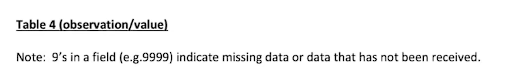

Now, we have to confirm whether our dataset doesn't contain any columns containing the value **9999**.

In [29]:
core_weather.apply(lambda x: (x==9999).sum())

,0
precipitation,0
max_temp,0
min_temp,0


Thankfully, we have no columns with these values in our remaining columns. **This is why reading the documentation of the dataset is important**

# Exploratory Data Analysis

Let's make some visual plots to see whether our data contains some outliers or oddities.

<Axes: xlabel='DATE'>

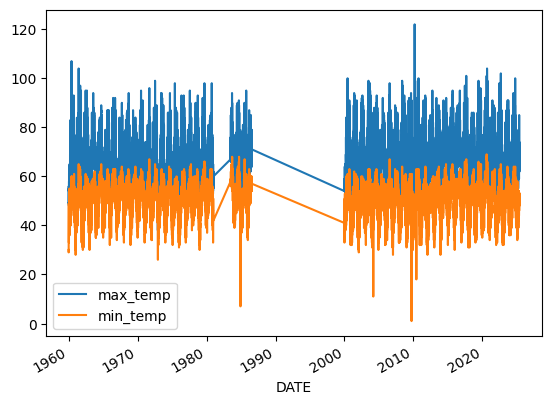

In [30]:
core_weather[['max_temp', 'min_temp']].plot()

Immediately, we see something curious. We are actually missing some data from 1983-1985 and 1990 - 1999. There could be various reasons behind this, like sensor malfunction. Let's pinpoint the exact years the data was missing.

In [32]:
core_weather.index.year.value_counts().sort_index()

,count
DATE,
1960,366
1961,365
1962,365
1963,365
1964,366
1965,365
1966,365
1967,365
1968,366


Immediately, we can see that there are very few values in the year **1983**. And this trend repeats in **1986**. We are also missing data after 1986 for many years. There are many ways to handle this situation. For example, we could also export data from another weather station in the region to fill this. But because we are working with historical data to predict future trends, we already have enough data for our prediction model, so we don't have to do the extra effort.

There are also very few outliers, like there is one case where the `max_temp` has risen to 120 and `min_temp` has plummeted close to 0, but since these are very few, it is not important to worry about them.

Let's plot the `precipitation` column now.

<Axes: xlabel='DATE'>

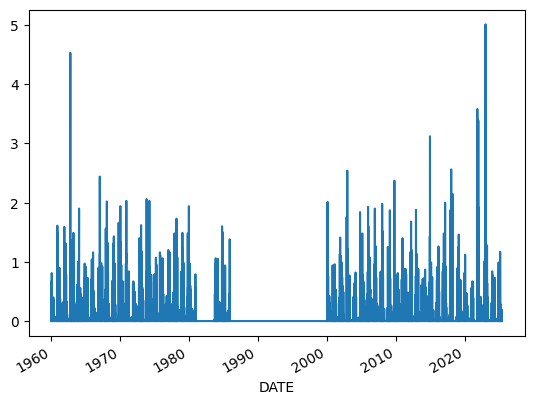

In [33]:
core_weather['precipitation'].plot()

Though the data looks normal, there are 2 visible outliers where we notice that the recorded rainfall is higher than 4 inches in a day. It seems a lot, but it is quite possible that it happened, since there are only 2 instances of it.

We can even see how much it has rained each year:

<Axes: xlabel='DATE'>

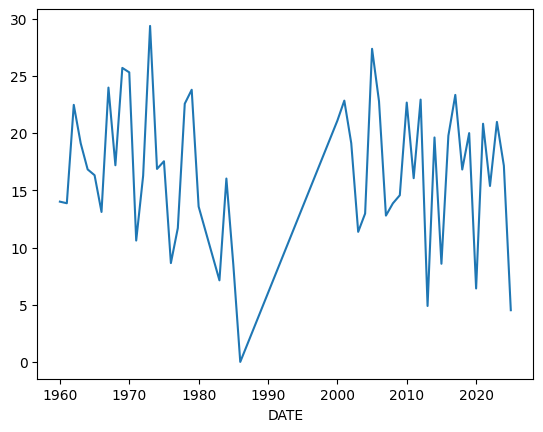

In [35]:
core_weather.groupby(core_weather.index.year).sum()['precipitation'].plot()

We can see the same gap in our dataset in every plot.

# Training the Model

This is the part where we work on the actual machine learning. The first step is actually knowing what we want to predict.

For this project, we will predict tomorrow's `max_temp` using historical data. This will be our target.

In [37]:
core_weather["target"] = core_weather.shift(-1)["max_temp"]
core_weather

,precipitation,max_temp,min_temp,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2025-05-21,0.0,74.0,49.0,66.0
2025-05-22,0.0,66.0,53.0,62.0
2025-05-23,0.0,62.0,52.0,62.0


Here, we've created new column named `target` and added to the `core_weather` dataset. This column represents the value we want our model to predict. The value assigned to this new column for each row is the `max_temp` from the * next* day. This ensures that we're only predicting tomorrow's temperature using data from today.

There's a missing data at the end of our dataset, because we don't yet have the record of the temperature after the last date of our dataset. Therefore, we will delete that row, since there's no way to fill it except by prediction.

In [38]:
core_weather = core_weather.iloc[:-1,:].copy()
core_weather

,precipitation,max_temp,min_temp,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2025-05-20,0.0,69.0,50.0,74.0
2025-05-21,0.0,74.0,49.0,66.0
2025-05-22,0.0,66.0,53.0,62.0


We've essentially made a copy of our dataset but without the last row.

## Importing the model

Since we're using **Ridge Regression** on this dataset, we will import it from sklearn

In [39]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

First, we import our model from the appropriate module. The next line, `reg = Ridge(alpha=.1)`, creates an instance of the Ridge regression model. This instance is assigned to the variable `reg`.

The `alpha` parameter in the `Ridge` model controls the strength of the **regularization**. Regularization is a technique used in machine learning to prevent overfitting by adding a penalty to the model's coefficients. A smaller `alpha` value means less regularization, while a larger value means more regularization. In this code, `alpha` is set to `0.1`, which is a small positive value, meaning a relatively light amount of regularization will be applied during the model training.

## Deciding on Predictors

Let's create our predictors.

In [40]:
predictors = ['max_temp', 'min_temp', 'precipitation']

## Test-Train split

In [41]:
train = core_weather.loc[:"2023-12-31"]
test = core_weather.loc["2024-01-01":]

- The first line selects all rows from the beginning of the `core_weather` dataset up to and including the date **"2023-12-31"**. This data will be used to train our Ridge Regression model.
- The second line selects all rows from the date **"2024-01-01"** up to and including the last date in the `core_weather` dataset. This data will be used to test how well our trained model can predict tomorrow's maximum temperature on data it hasn't seen before.

## Fitting the model

In this step, we will fit our model on the `predictors` and try to predict our `target`.

In [42]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

Now that our model has been fit, let's generate predictions on our test dataset using the predictors column.

In [43]:
predictions = reg.predict(test[predictors])

## Scoring the Model

Let's see how well our model has predicted by scoring it using the **mean absolute error**, which substracts the ground truth from the predicted truth, takes the absolute value, and finds the average of those values across all predictions.

In [44]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test["target"], predictions)

3.50453251625146

This means that, on average, we were **3.5** degrees off our actual temperature.

# Model Evaluation

First, let's combine our ground truth and predicted truth, for comparison purposes.

In [45]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "prediction"]
combined

,actual,prediction
DATE,,
2024-01-01,62.0,59.284763
2024-01-02,59.0,61.514405
2024-01-03,58.0,60.193655
2024-01-04,61.0,58.753097
2024-01-05,56.0,61.275080
...,...,...
2025-05-20,74.0,68.118518
2025-05-21,66.0,71.553862
2025-05-22,62.0,66.482645


Now we can clearly see the difference between our actual and predicted values, and we can see that at some points, our model has performed very well while at others, our model's predictions are not so close to the actual values. Let's plot this.

<Axes: xlabel='DATE'>

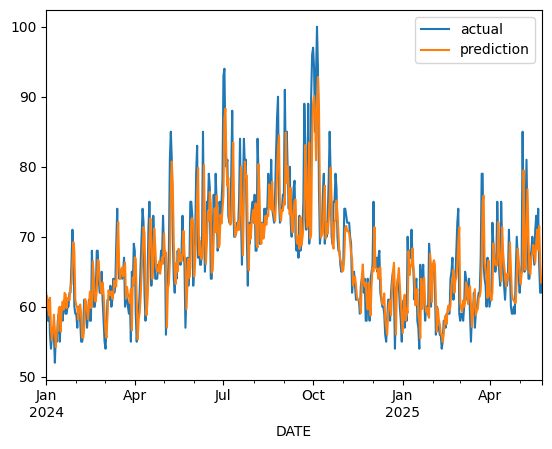

In [46]:
combined.plot()

From this, we can see that our model's predictions are more conservative when compared to the actual values.

Let's look at the coefficients of our model.

In [47]:
reg.coef_

array([ 0.7225132 ,  0.17722203, -2.10081758])

From this we can determine that:
- `precipitation`	has a negative impact on temperature
- `max_temp` has the biggest impact on temperature
- `min_temp` has a smaller impact

# A function to make predictions

In [48]:
def create_predictions(predictors, core_weather, reg):
  train = core_weather.loc[:"2023-12-31"]
  test = core_weather.loc["2024-01-01":]
  reg.fit(train[predictors], train["target"])
  predictions = reg.predict(test[predictors])
  error = mean_absolute_error(test["target"], predictions)
  combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
  combined.columns = ["actual", "predictions"]
  return error, combined

Making this function will allow us to iterate our model instead of writing the code over and over again, we can always just call this function to do that for us.

## Feature Engineering

Let's look at the average temperature this month by taking a **rolling** mean through the pandas rolling method.

In [49]:
core_weather["max_month"] = core_weather["max_temp"].rolling(30).mean()

We've used the `.rolling(30)` pandas method on the `max_temp` column. It creates a **"rolling window"** object. The number `30` inside the parentheses specifies the size of the window in terms of the number of consecutive data points. In this case, for each date in the dataset, the rolling window will include that date and the preceding 29 dates (a total of 30 days). Then the `.mean()` pandas method is applied to the rolling window object. It calculates the mean (average) of the values within the current rolling window.

In [50]:
core_weather

,precipitation,max_temp,min_temp,target,max_month
DATE,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN
1960-01-02,0.0,49.0,29.0,54.0,NaN
1960-01-03,0.0,54.0,35.0,54.0,NaN
1960-01-04,0.0,54.0,36.0,55.0,NaN
1960-01-05,0.0,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2025-05-20,0.0,69.0,50.0,74.0,67.233333
2025-05-21,0.0,74.0,49.0,66.0,67.333333
2025-05-22,0.0,66.0,53.0,62.0,67.366667


We find a lot of NULL values in the beginning, because these values don't have 30 days before this row, so the rolling fails here.

Now, let's investigate whether for a given day, was the temperature different than the monthly mean.

In [51]:
core_weather["month_day_max"] = core_weather['max_month'] / core_weather["max_temp"]
core_weather

,precipitation,max_temp,min_temp,target,max_month,month_day_max
DATE,,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN,NaN
1960-01-02,0.0,49.0,29.0,54.0,NaN,NaN
1960-01-03,0.0,54.0,35.0,54.0,NaN,NaN
1960-01-04,0.0,54.0,36.0,55.0,NaN,NaN
1960-01-05,0.0,55.0,33.0,53.0,NaN,NaN
...,...,...,...,...,...,...
2025-05-20,0.0,69.0,50.0,74.0,67.233333,0.974396
2025-05-21,0.0,74.0,49.0,66.0,67.333333,0.909910
2025-05-22,0.0,66.0,53.0,62.0,67.366667,1.020707


Let's now look at the ratio between the maximimum and minimum temperatures.

In [52]:
core_weather["max_min"] = core_weather["max_temp"] / core_weather["min_temp"]
core_weather

,precipitation,max_temp,min_temp,target,max_month,month_day_max,max_min
DATE,,,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN,NaN,1.633333
1960-01-02,0.0,49.0,29.0,54.0,NaN,NaN,1.689655
1960-01-03,0.0,54.0,35.0,54.0,NaN,NaN,1.542857
1960-01-04,0.0,54.0,36.0,55.0,NaN,NaN,1.500000
1960-01-05,0.0,55.0,33.0,53.0,NaN,NaN,1.666667
...,...,...,...,...,...,...,...
2025-05-20,0.0,69.0,50.0,74.0,67.233333,0.974396,1.380000
2025-05-21,0.0,74.0,49.0,66.0,67.333333,0.909910,1.510204
2025-05-22,0.0,66.0,53.0,62.0,67.366667,1.020707,1.245283


These additional columns can help make our predictions better, since we've essentially generated more features. Let's use these additional columns as predictors.

In [53]:
predictors = ["precipitation", "max_temp", "min_temp", "max_month", "month_day_max", "max_min"]

Before we begin with applying our function to these new predictors, let's first get rid of the rows containing NULL values. Since we know that the NULL values are only in the first month of our dataset, let's get rid of it.

In [54]:
core_weather = core_weather.iloc[30:,:].copy()

Now, let's run our function to make predictions with these new predictors

In [55]:
error, combined = create_predictions(predictors, core_weather, reg)

Let's see whether our MAE has improved

In [56]:
error

3.427169061341418

So, where previously it was 3.5, now it is 3.4. There is an improvement, but not much. And we can even see this visually:

<Axes: xlabel='DATE'>

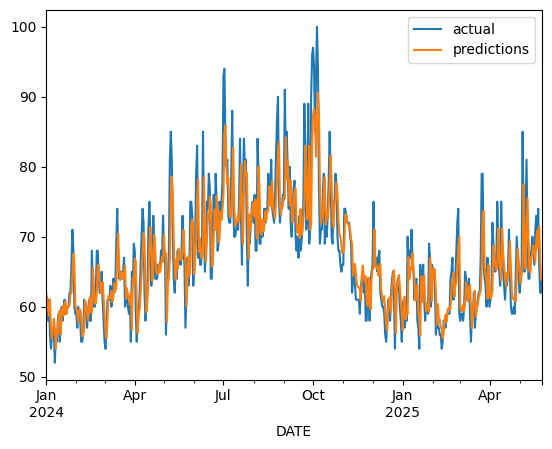

In [57]:
combined.plot()

Let's increase the number of predictors by adding **averages** into consideration.

We will first calculcate the **monthly average temperature** historically. We can easily do this, since we've made the dates our index.

In [61]:
core_weather["monthly_avg"] = core_weather.groupby(core_weather.index.month)["max_temp"].transform(lambda x: x.expanding(1).mean())

In this code, we've grouped the data by month (1 to 12), based on our dataframe's index. For example, all rows from January across all years are grouped together, same for February, etc.

`.expanding(1).mean()` computes the cumulative average (i.e., expanding mean) of the `max_temp` values. This means for each value in the group, it takes the average of that value and all previous values in that month group.

In [62]:
core_weather

,precipitation,max_temp,min_temp,target,max_month,month_day_max,max_min,monthly_avg
DATE,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000
...,...,...,...,...,...,...,...,...
2025-05-20,0.00,69.0,50.0,74.0,67.233333,0.974396,1.380000,67.179987
2025-05-21,0.00,74.0,49.0,66.0,67.333333,0.909910,1.510204,67.184416
2025-05-22,0.00,66.0,53.0,62.0,67.366667,1.020707,1.245283,67.183647


We can do something similar to find daily average as well:

In [63]:
core_weather["day_of_year_avg"] = core_weather.groupby(core_weather.index.day_of_year)["max_temp"].transform(lambda x: x.expanding(1).mean())
core_weather

,precipitation,max_temp,min_temp,target,max_month,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000,59.00
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000,62.00
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000,59.00
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000,59.00
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000,60.00
...,...,...,...,...,...,...,...,...,...
2025-05-20,0.00,69.0,50.0,74.0,67.233333,0.974396,1.380000,67.179987,67.48
2025-05-21,0.00,74.0,49.0,66.0,67.333333,0.909910,1.510204,67.184416,67.30
2025-05-22,0.00,66.0,53.0,62.0,67.366667,1.020707,1.245283,67.183647,67.02


Now, let's update our predictors with these additional columns

In [64]:
predictors = ["precipitation", "max_temp", "min_temp", "max_month", "month_day_max", "max_min", "monthly_avg", "day_of_year_avg"]

And let's call our function on these updated predictors

In [65]:
error, combined = create_predictions(predictors, core_weather, reg)

In [66]:
error

3.3870842994134454

Now our error has gone done from **3.4** to **3.3**. This is a significant decrease. Let's plot this.

<Axes: xlabel='DATE'>

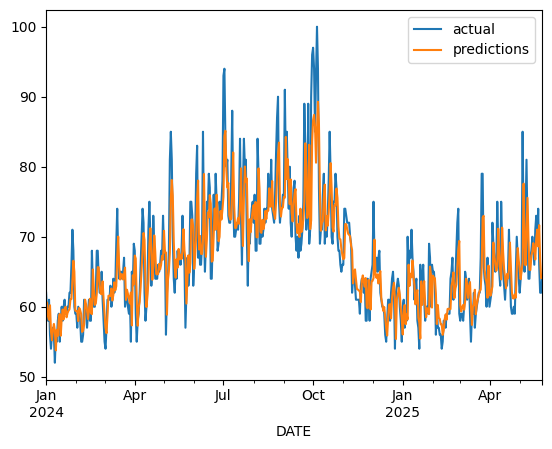

In [67]:
combined.plot()

Same case as before: we cannot visualize the improvement since it's so minimal.

# Model Diagnostics

Let's look at the coefficients of our model to see which variables contribute most and which don't.

In [68]:
reg.coef_

array([ -0.86495437,   0.40166252,   0.02856331,   0.33574832,
       -15.98701418,   0.04695115,   0.14255282,   0.0837666 ])

Let's look at correlations to see which columns correlate with our target. This will help us diagnose whether our predictors are relevant to the predictions.

In [70]:
core_weather.corr()["target"]

,target
precipitation,-0.206222
max_temp,0.821609
min_temp,0.595757
target,1.000000
max_month,0.688463
month_day_max,-0.419602
max_min,0.045214
monthly_avg,0.690280
day_of_year_avg,0.712275


According to this table, the **positively correlated** columns are:

- `max_temp`: 0.821609 **(Strongest correlation)**

- `day_of_year_avg`: 0.712275

- `monthly_avg`: 0.690280

- `max_month`: 0.688463

- `min_temp`: 0.595757

The **negatively correlated** columns are:

- `month_day_max`: -0.419602

- `precipitation`: -0.206222

The column with the **weakest** column is:
- `max_min`: 0.045214 **(Very weak/insignificant relationship with the target.)**

Therefore, the most useful columns for prediction are: `max_temp`, `day_of_year_avg`, and `monthly_avg`. But the columns that can hurt our model if used without caution are: `month_day_max`, `precipitation`, and `max_min`




Let's find the absolute difference between the absolute and predicted value, and look at the biggest differences between the actual temperature and predicted temperature.

In [71]:
combined["diff"] = (combined['actual'] - combined['predictions']).abs()
combined.sort_values("diff", ascending=False).head()

,actual,predictions,diff
DATE,,,
2025-05-04,85.0,66.244906,18.755094
2024-09-29,90.0,72.329970,17.670030
2024-07-01,93.0,75.705037,17.294963
2024-06-10,85.0,69.401319,15.598681
2024-09-02,91.0,75.577112,15.422888


These are the top 5 rows with the highest difference between predicted values and actual values.

#Making Weekly Predictions

We could try improving our predictions by focusing on weeks, rather than making daily predictions, since you can generally predict weekly weather with more accuracy.

The first step is to resample to weekly. We will take weekly mean temps and total precipitation

In [77]:
weather_weekly = (
    core_weather
    .resample('W')
    .agg({
        'max_temp': 'mean',
        'min_temp': 'mean',
        'precipitation': 'sum'
    })
    .rename(columns={'precipitation': 'precip_weekly'})
)

In this step, we Recreate our target to next-week’s avg temperature

In [78]:
weather_weekly['target_max_temp_next'] = weather_weekly['max_temp'].shift(-1)

Now, we will rop the last row, since it has no target, and any NULL values with it

In [79]:
weekly = weather_weekly.dropna()

For improved accuracy, we will add further calendar features: `week-of-year` and `month`

In [80]:
weekly['week_of_year'] = weekly.index.isocalendar().week
weekly['month'] = weekly.index.month

<ipython-input-80-26578298420c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly['week_of_year'] = weekly.index.isocalendar().week
<ipython-input-80-26578298420c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly['month'] = weekly.index.month


Let's create the test-train split

In [89]:
train = weekly.loc[:"2023-12-31"]
test = weekly.loc["2024-01-01":]

Now, let's update our predictors:

In [90]:
predictors = ['max_temp', 'min_temp', 'precip_weekly', 'week_of_year', 'month']

Let's fit the model on these updated predictors

In [91]:
reg.fit(train[predictors], train['target_max_temp_next'])

Ridge(alpha=0.1)

And make some predictions

In [92]:
preds = reg.predict(test[predictors])

Let's look at the **MAE**

In [93]:
mean_absolute_error(test['target_max_temp_next'], preds)

3.2702468251323102

OK, so we've gone down from **3.3** to **3.2**. This is another significant step. It seems that we're continuously reducing our MAE by each step we take, but not too significantly. Once again, plotting this will provide us with a similar picture:

<Axes: xlabel='DATE'>

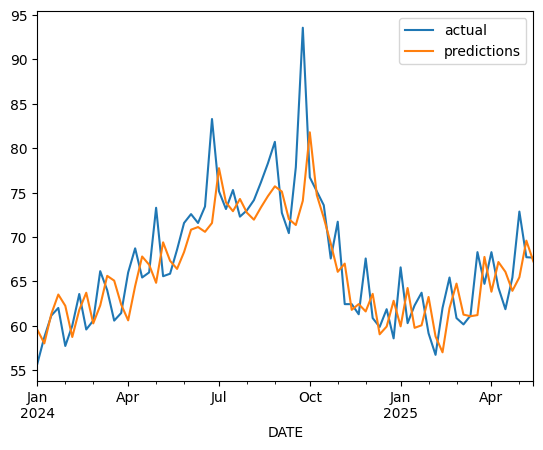

In [94]:
combined = pd.concat([test["target_max_temp_next"], pd.Series(preds, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]
combined.plot()

Once again, our predictions appear to be very conservative when compared to actual values.

# Backtesting
Let's do a simple “year-by-year” walk-forward **backtest** by looping through each calendar year in our data, training on everything before that year and testing on that year. This will give us a more robust error metric.

In [95]:
weekly = weekly.copy()
weekly.index = pd.to_datetime(weekly.index)

years = weekly.index.year.unique()
errors = []

We will skip the very first year, since we have no “history” before it


In [96]:
for year in years[1:]:
    # train on all data up to Dec 31 of the previous year
    train = weekly[weekly.index.year < year]
    # test on all data in the target year
    test  = weekly[weekly.index.year == year]

    if len(test) == 0:
        continue

    # fit model
    predictors = ['max_temp', 'min_temp', 'precip_weekly', 'week_of_year', 'month']
    model = Ridge()
    model.fit(train[predictors], train['target_max_temp_next'])

    # predict & score
    preds = model.predict(test[predictors])
    mae   = mean_absolute_error(test['target_max_temp_next'], preds)
    print(f"{year}: MAE = {mae:.2f}")
    errors.append(mae)

1961: MAE = 3.91
1962: MAE = 3.43
1963: MAE = 3.72
1964: MAE = 4.44
1965: MAE = 3.51
1966: MAE = 2.58
1967: MAE = 2.95
1968: MAE = 3.27
1969: MAE = 2.60
1970: MAE = 3.38
1971: MAE = 3.09
1972: MAE = 3.31
1973: MAE = 3.09
1974: MAE = 3.06
1975: MAE = 2.67
1976: MAE = 3.07
1977: MAE = 2.78
1978: MAE = 2.65
1979: MAE = 2.72
1980: MAE = 3.16
1983: MAE = 3.11
1984: MAE = 3.25
1985: MAE = 3.33
1986: MAE = 2.57
2000: MAE = 3.12
2001: MAE = 3.00
2002: MAE = 3.68
2003: MAE = 3.42
2004: MAE = 3.51
2005: MAE = 2.54
2006: MAE = 2.90
2007: MAE = 2.94
2008: MAE = 4.16
2009: MAE = 3.95
2010: MAE = 3.57
2011: MAE = 3.37
2012: MAE = 2.58
2013: MAE = 3.64
2014: MAE = 2.88
2015: MAE = 3.25
2016: MAE = 2.46
2017: MAE = 3.65
2018: MAE = 2.69
2019: MAE = 3.45
2020: MAE = 3.49
2021: MAE = 3.14
2022: MAE = 3.62
2023: MAE = 2.61
2024: MAE = 3.19
2025: MAE = 3.47


In [98]:
import numpy as np
print(f"\nAverage yearly MAE: {np.mean(errors):.2f} ± {np.std(errors):.2f}")


Average yearly MAE: 3.20 ± 0.45


# Using LightGBM
Let’s use `LightGBM`, a fast gradient‐boosting library, in place of `Ridge` to see if we get any improvement.

In [101]:
from lightgbm import LGBMRegressor

In [144]:
weekly['max_temp_lag1'] = weekly['max_temp'].shift(1)
weekly['max_temp_rolling3'] = weekly['max_temp'].rolling(3).mean()
weekly['temp_diff'] = weekly['max_temp'] - weekly['min_temp']
weekly = weekly.dropna()

In [141]:
lgb = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=5,
    num_leaves=31,
    min_data_in_leaf=10,
    min_split_gain=0.0,
    verbosity=-1,
    random_state=42
)

In [147]:
train = weekly.loc[:"2023-12-31"]
test = weekly.loc["2024-01-01":]

lgb.fit(train[predictors], train['target_max_temp_next'])

LGBMRegressor(max_depth=5, min_data_in_leaf=10, n_estimators=500,
              random_state=42, verbosity=-1)

In [149]:
preds = lgb.predict(test[predictors])

In [150]:
mean_absolute_error(test['target_max_temp_next'], preds)

3.165513727530878

OK, so we've gone down again from **3.2** all the way to **3.1**

Let's do backtesting with `LightGBM`

In [151]:
years = weekly.index.year.unique()
errors_lgb = []

for year in years[1:]:
    train = weekly[weekly.index.year < year]
    test  = weekly[weekly.index.year == year]
    if test.empty:
        continue

    X_train = train[predictors]
    y_train = train['target_max_temp_next']
    X_test  = test[predictors]
    y_test  = test['target_max_temp_next']


    lgb = LGBMRegressor(
      n_estimators=500,
      learning_rate=0.1,
      max_depth=5,
      num_leaves=31,
      min_data_in_leaf=10,
      min_split_gain=0.0,
      verbosity=-1,
      random_state=42)

    lgb.fit(X_train, y_train)

    preds = lgb.predict(X_test)
    mae   = mean_absolute_error(y_test, preds)
    print(f"{year}: LightGBM MAE = {mae:.2f}")
    errors_lgb.append(mae)

print(f"\nLightGBM avg MAE: {np.mean(errors_lgb):.2f} ± {np.std(errors_lgb):.2f}")

1961: LightGBM MAE = 4.44
1962: LightGBM MAE = 4.71
1963: LightGBM MAE = 4.74
1964: LightGBM MAE = 4.65
1965: LightGBM MAE = 3.40
1966: LightGBM MAE = 3.02
1967: LightGBM MAE = 3.10
1968: LightGBM MAE = 3.56
1969: LightGBM MAE = 3.09
1970: LightGBM MAE = 4.15
1971: LightGBM MAE = 3.28
1972: LightGBM MAE = 3.81
1973: LightGBM MAE = 3.30
1974: LightGBM MAE = 2.83
1975: LightGBM MAE = 3.34
1976: LightGBM MAE = 3.37
1977: LightGBM MAE = 3.18
1978: LightGBM MAE = 2.73
1979: LightGBM MAE = 3.02
1980: LightGBM MAE = 3.44
1983: LightGBM MAE = 3.24
1984: LightGBM MAE = 3.32
1985: LightGBM MAE = 3.19
1986: LightGBM MAE = 2.75
2000: LightGBM MAE = 3.62
2001: LightGBM MAE = 3.07
2002: LightGBM MAE = 3.12
2003: LightGBM MAE = 3.24
2004: LightGBM MAE = 3.43
2005: LightGBM MAE = 3.13
2006: LightGBM MAE = 2.97
2007: LightGBM MAE = 2.96
2008: LightGBM MAE = 3.67
2009: LightGBM MAE = 3.30
2010: LightGBM MAE = 3.31
2011: LightGBM MAE = 4.17
2012: LightGBM MAE = 2.86
2013: LightGBM MAE = 3.66
2014: LightG

OK, so our average MAE has gone down somewhat, but we still don't see much progress. Can we make one last effort to bring this down? We could try **GridSearchCV** to find the best hyperparameters against **MAE**

Let's import the important libraries first:

In [112]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import make_scorer

Defining our feature matrix X and target y

In [152]:
X = weekly[predictors]
y = weekly['target_max_temp_next']

Setting up a time-series cross-validator

In [153]:
tscv = TimeSeriesSplit(n_splits=5)

Defining the parameter grid we want to search

In [154]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63],
    'subsample': [0.6, 0.8, 1.0],
}

Wrapping in GridSearchCV, and scoring by MAE

In [155]:
grid = GridSearchCV(
    estimator=LGBMRegressor(random_state=42),
    param_grid=param_grid,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False),
    cv=tscv,
    n_jobs=-1,
    verbose=1,
    refit=True
)

Fitting in our predictors and target:

In [156]:
grid.fit(X, y)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LGBMRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 500],
                         'num_leaves': [15, 31, 63],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Let's inspect the results

In [157]:
print("Best params:", grid.best_params_)
print("Best CV MAE:", -grid.best_score_)

Best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'num_leaves': 15, 'subsample': 0.6}
Best CV MAE: 2.937825429864567


Let's now use the best estimator for backtesting or final predictions

In [158]:
best_model = grid.best_estimator_

In [159]:
years = weekly.index.year.unique()
errors_lgb = []

for year in years[1:]:
    train = weekly[weekly.index.year < year]
    test  = weekly[weekly.index.year == year]
    if test.empty:
        continue

    X_train = train[predictors]
    y_train = train['target_max_temp_next']
    X_test  = test[predictors]
    y_test  = test['target_max_temp_next']


    model_lgb = best_model
    model_lgb.fit(X_train, y_train)

    preds = model_lgb.predict(X_test)
    mae   = mean_absolute_error(y_test, preds)
    print(f"{year}: LightGBM MAE = {mae:.2f}")
    errors_lgb.append(mae)

print(f"\nLightGBM avg MAE: {np.mean(errors_lgb):.2f} ± {np.std(errors_lgb):.2f}")

1961: LightGBM MAE = 4.40
1962: LightGBM MAE = 4.03
1963: LightGBM MAE = 3.83
1964: LightGBM MAE = 3.57
1965: LightGBM MAE = 3.11
1966: LightGBM MAE = 2.26
1967: LightGBM MAE = 2.86
1968: LightGBM MAE = 3.03
1969: LightGBM MAE = 2.58
1970: LightGBM MAE = 3.42
1971: LightGBM MAE = 3.04
1972: LightGBM MAE = 2.94
1973: LightGBM MAE = 2.67
1974: LightGBM MAE = 2.85
1975: LightGBM MAE = 2.67
1976: LightGBM MAE = 2.99
1977: LightGBM MAE = 2.73
1978: LightGBM MAE = 2.29
1979: LightGBM MAE = 2.52
1980: LightGBM MAE = 2.90
1983: LightGBM MAE = 2.65
1984: LightGBM MAE = 2.94
1985: LightGBM MAE = 3.10
1986: LightGBM MAE = 2.54
2000: LightGBM MAE = 2.93
2001: LightGBM MAE = 2.92
2002: LightGBM MAE = 3.15
2003: LightGBM MAE = 2.96
2004: LightGBM MAE = 3.18
2005: LightGBM MAE = 2.36
2006: LightGBM MAE = 2.65
2007: LightGBM MAE = 2.59
2008: LightGBM MAE = 3.69
2009: LightGBM MAE = 3.28
2010: LightGBM MAE = 3.10
2011: LightGBM MAE = 3.63
2012: LightGBM MAE = 2.43
2013: LightGBM MAE = 3.10
2014: LightG

So even with our best hyperparameters using the predictors that we've developed so far, the lowest MAE we can get with LightGBM is **2.99**